# Tobigs 22기 3주차 정규세션 Ensemble 과제

# 과제1. High variance/bias

개념참조영상 : https://www.youtube.com/watch?v=EuBBz3bI-aA

## Q1. High variance의 정의 및 문제점에 대해 설명해주세요.

🐻‍❄️ High variance는 모델이 학습 데이터에 대해 매우 좋은 성능을 보이지만, 테스트 데이터나 새로운 데이터에 대해서는 성능이 급격히 저하되는 현상을 말합니다.
High variance는 일반화 성능 저하, 과적합, 모델 복잡도 증가, 신뢰성 감소 등의 문제점을 가지고 있습니다.

## Q2. High bias의 정의 및 문제점에 대해 설명해주세요.

🐻‍❄️ High bias는 머신러닝 모델이 학습 데이터에서 패턴을 충분히 학습하지 못해, 훈련 데이터와 테스트 데이터 모두에서 성능이 낮은 경우를 말합니다.
High bias는 과소적합, 일반화 성능 저하, 예측력 감소, 신뢰성 저하 등의 문제점을 가지고 있습니다.

## Q3. High variance 와 high bias를 다룰때 적합한 ensemble 방식과 그 이유를 적어주세요.

- High variance problem :
🐻‍❄️ High variance를 다룰때 적합한 앙상블 방식은 Bagging입니다.
High variance 모델은 학습 데이터에 과적합되어 새로운 데이터에 대한 일반화 성능이 떨어집니다. Bagging은 여러 개의 모델을 학습시키기 위해 학습 데이터를 여러 번 샘플링하여 각각의 모델을 독립적으로 학습시킨 후, 이 모델들의 예측을 평균화하거나 다수결 투표를 통해 결합합니다. 이를 통해 모델의 변동성이 줄어들고, 더 안정적인 예측이 가능합니다.


- High bias problem : 🐻‍❄️ High bias problem을 다룰때 적합한 앙상블 방식은 Boosting입니다.
High bias 모델은 학습 데이터의 패턴을 충분히 학습하지 못해 과소적합된 상태입니다. Boosting은 순차적으로 모델을 학습시키며, 각 모델은 이전 모델이 잘못 예측한 데이터에 가중치를 부여해 학습하는 방식입니다. 이를 통해 Boosting은 모델이 데이터의 복잡한 패턴을 더 잘 학습하게 되어 bias를 줄이는 데 효과적입니다.

# 과제2. Ensemble 실습

데이터 출처: https://www.kaggle.com/sakshigoyal7/credit-card-customers

## 목표 : 은행 신용 카드 서비스 이탈 고객 예측 모델 만들기!

### 칼럼 설명
```
[features]
 - Customer_Age : 고객의 나이
 - Gender : 성별 (M=Male, F=Female)
 - Dependent_count : 부양하는 가족의 수
 - Education_Level : 고객의 최종 학력 (example: high school, college graduate, etc.)
 - Marital_Status : 결혼 상태 (Married, Single, Divorced, Unknown)
 - Income_Category : 소득 범주 (< $40K, $40K - 60K, $60K - $80K, $80K-$120K, etc.)
 - Card_Category : 카드 종류 (Blue, Silver, Gold, Platinum)
 - Months_on_book : 은행과의 관계 기간 (개월 수)
 - Total_Relationship_Count : 고객이 보유한 전체 제품 수
 - Months_Inactive_12_mon : 최근 12개월 동안 비활성화된 개월 수
 - Contacts_Count_12_mon : 최근 12개월 동안의 연락 횟수
 - Credit_Limit : 신용 카드의 신용 한도
 - Total_Revolving_Bal : 신용 카드의 총 회전 잔액
 - Avg_Open_To_Buy : 구매 가능 신용 한도 (최근 12개월 평균)
 - Total_Amt_Chng_Q4_Q1 : 거래 금액 변화율 (4분기 대비 1분기)
 - Total_Trans_Amt :  총 거래 금액 (지난 12개월)
 - Total_Trans_Ct : 총 거래 횟수 (지난 12개월)
 - Total_Ct_Chng_Q4_Q1 : 거래 횟수 변화율 (4분기 대비 1분기)
 - Avg_Utilization_Ratio : 평균 카드 이용 비율

[target]
 - Attrition_Flag : 고객 활동 변수 / Existing Customer - 0, Attrited Customer - 1

```


In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [68]:
import pandas as pd

# 🐻‍❄️데이터의 경로는 변경해주세요
df = pd.read_csv('/content/drive/MyDrive/BankChurners.csv')

# Feature 21 & 22의 경우 데이터 셋에서 삭제하는 것을 추천하는 문구 발견, 삭제
print(len(df.columns))
df.drop(df.columns[[21, 22]], axis = 1, inplace = True) # inplace = True 데이터 원본에서 처리 not copy
print(len(df.columns))

23
21


In [69]:
df.head()

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,...,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,...,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,...,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,...,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000


In [70]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   CLIENTNUM                 10127 non-null  int64  
 1   Attrition_Flag            10127 non-null  object 
 2   Customer_Age              10127 non-null  int64  
 3   Gender                    10127 non-null  object 
 4   Dependent_count           10127 non-null  int64  
 5   Education_Level           10127 non-null  object 
 6   Marital_Status            10127 non-null  object 
 7   Income_Category           10127 non-null  object 
 8   Card_Category             10127 non-null  object 
 9   Months_on_book            10127 non-null  int64  
 10  Total_Relationship_Count  10127 non-null  int64  
 11  Months_Inactive_12_mon    10127 non-null  int64  
 12  Contacts_Count_12_mon     10127 non-null  int64  
 13  Credit_Limit              10127 non-null  float64
 14  Total_

## EDA & Preprocessing

EDA를 통해 인사이트를 얻고 전처리를 진행해주세요.

In [71]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder, StandardScaler, OrdinalEncoder
from sklearn.model_selection import train_test_split

#1. 결측치 처리
df[['Education_Level', 'Income_Category', 'Marital_Status']] = df[['Education_Level', 'Income_Category', 'Marital_Status']].replace('Unknown', np.nan)
df.fillna(df.mode().iloc[0], inplace=True)

# 2. 범주형 변수 인코딩
# 순서가 있는 범주형 변수에 대해 Ordinal Encoding 사용
ordinal_cols = ['Education_Level', 'Income_Category']  # 순서가 있는 변수 목록
ordinal_encoder = OrdinalEncoder()
df[ordinal_cols] = ordinal_encoder.fit_transform(df[ordinal_cols])

# 순서가 없는 범주형 변수에 대해 Label Encoding 사용
label_cols = ['Marital_Status', 'Gender', 'Card_Category']
label_encoders = {}
for col in label_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

# 'Attrition_Flag'를 수치형으로 변환 (0: Existing Customer, 1: Attrited Customer)
df['Attrition_Flag'] = df['Attrition_Flag'].apply(lambda x: 1 if x == 'Attrited Customer' else 0)

#3. 불필요한 열 제거
df.drop(['CLIENTNUM'], axis=1, inplace=True)

#4. 특성 스케일링
scaler = StandardScaler()
numerical_cols = ['Customer_Age', 'Dependent_count', 'Months_on_book',
                  'Months_Inactive_12_mon', 'Contacts_Count_12_mon',
                  'Credit_Limit', 'Total_Revolving_Bal', 'Avg_Open_To_Buy',
                  'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt',
                  'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio']
df[numerical_cols] = scaler.fit_transform(df[numerical_cols])

#5. 데이터 확인
print("Data types:\n", df.dtypes)
print("First few rows of the dataframe:\n", df.head())
print("Dataframe info:\n", df.info())

#6. 모델링을 위한 데이터 분리
X = df.drop('Attrition_Flag', axis=1)
y = df['Attrition_Flag']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Training set size: {X_train.shape}, Test set size: {X_test.shape}")

Data types:
 Attrition_Flag                int64
Customer_Age                float64
Gender                        int64
Dependent_count             float64
Education_Level             float64
Marital_Status                int64
Income_Category             float64
Card_Category                 int64
Months_on_book              float64
Total_Relationship_Count      int64
Months_Inactive_12_mon      float64
Contacts_Count_12_mon       float64
Credit_Limit                float64
Total_Revolving_Bal         float64
Avg_Open_To_Buy             float64
Total_Amt_Chng_Q4_Q1        float64
Total_Trans_Amt             float64
Total_Trans_Ct              float64
Total_Ct_Chng_Q4_Q1         float64
Avg_Utilization_Ratio       float64
dtype: object
First few rows of the dataframe:
    Attrition_Flag  Customer_Age  Gender  Dependent_count  Education_Level  \
0               0     -0.165406       1         0.503368              3.0   
1               0      0.333570       0         2.043199         

## Modeling

다음 4가지 모델의 성능을 비교해주세요.
- Decision Tree
- Random Forest
- Adaboost
- Gradientboosting
- 이외 다른 ensemble 모델을 사용하셔도 됩니다!


In [72]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score, roc_auc_score, classification_report
import matplotlib.pyplot as plt

# 1. Decision Tree
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)
dt_pred = dt_model.predict(X_test)

dt_acc = accuracy_score(y_test, dt_pred)
dt_auc = roc_auc_score(y_test, dt_model.predict_proba(X_test)[:, 1])

# 2. Random Forest
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)
rf_pred = rf_model.predict(X_test)

rf_acc = accuracy_score(y_test, rf_pred)
rf_auc = roc_auc_score(y_test, rf_model.predict_proba(X_test)[:, 1])

# 3. AdaBoost
ab_model = AdaBoostClassifier(random_state=42)
ab_model.fit(X_train, y_train)
ab_pred = ab_model.predict(X_test)

ab_acc = accuracy_score(y_test, ab_pred)
ab_auc = roc_auc_score(y_test, ab_model.predict_proba(X_test)[:, 1])

# 4. Gradient Boosting
gb_model = GradientBoostingClassifier(random_state=42)
gb_model.fit(X_train, y_train)
gb_pred = gb_model.predict(X_test)

gb_acc = accuracy_score(y_test, gb_pred)
gb_auc = roc_auc_score(y_test, gb_model.predict_proba(X_test)[:, 1])

Decision Tree - Accuracy: 0.9329, AUC: 0.8698
              precision    recall  f1-score   support

           0       0.96      0.96      0.96      1699
           1       0.80      0.78      0.79       327

    accuracy                           0.93      2026
   macro avg       0.88      0.87      0.87      2026
weighted avg       0.93      0.93      0.93      2026



Random Forest - Accuracy: 0.9585, AUC: 0.9900
              precision    recall  f1-score   support

           0       0.96      0.99      0.98      1699
           1       0.93      0.80      0.86       327

    accuracy                           0.96      2026
   macro avg       0.95      0.90      0.92      2026
weighted avg       0.96      0.96      0.96      2026



AdaBoost - Accuracy: 0.9506, AUC: 0.9821
              precision    recall  f1-score   support

           0       0.96      0.98      0.97      1699
           1       0.87      0.81      0.84       327

    accuracy                           0.95  

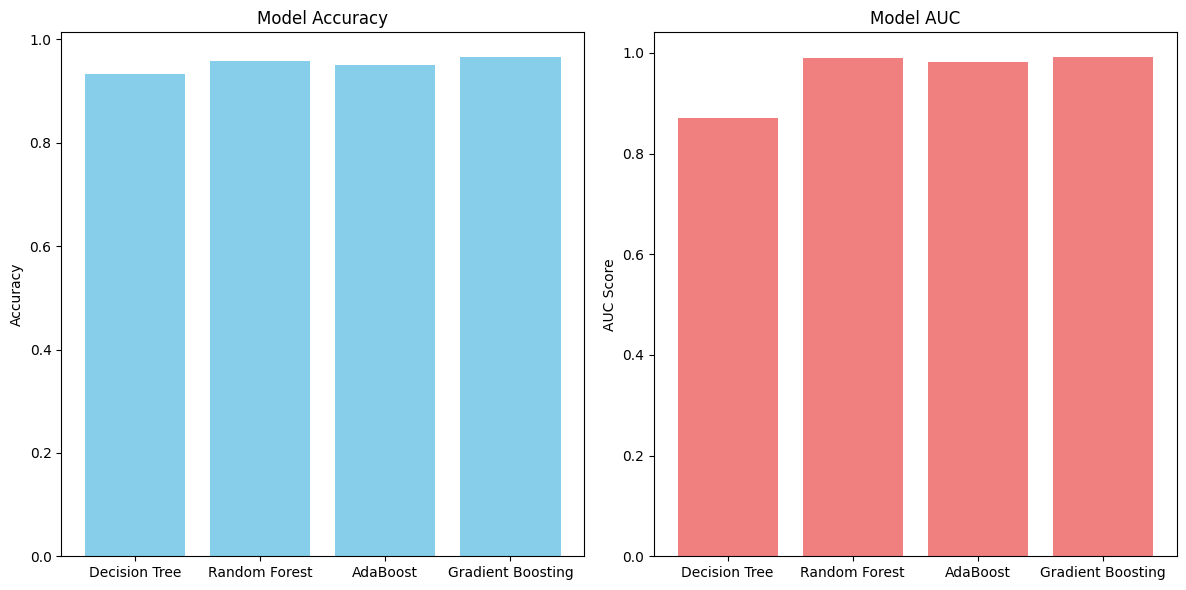

In [73]:
# 결과 비교
models = ['Decision Tree', 'Random Forest', 'AdaBoost', 'Gradient Boosting']
accuracies = [dt_acc, rf_acc, ab_acc, gb_acc]
aucs = [dt_auc, rf_auc, ab_auc, gb_auc]

# 정확도 및 AUC 출력
for i, model in enumerate(models):
    print(f"{model} - Accuracy: {accuracies[i]:.4f}, AUC: {aucs[i]:.4f}")
    print(classification_report(y_test, [dt_pred, rf_pred, ab_pred, gb_pred][i]))
    print("\n" + "="*60 + "\n")

# 성능 시각화
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.bar(models, accuracies, color='skyblue')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')

plt.subplot(1, 2, 2)
plt.bar(models, aucs, color='lightcoral')
plt.title('Model AUC')
plt.ylabel('AUC Score')

plt.tight_layout()
plt.show()